In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales_data (
     id INTEGER PRIMARY KEY AUTOINCREMENT,
      product TEXT,
      quantity INTEGER,
      price REAL
   )
    ''')
conn.commit()

In [3]:
sales_data = [
    ('Product A', 10, 20.5),
    ('Product B', 5, 15.0),
    ('Product A', 7, 20.5),
    ('Product C', 3, 30.0),
    ('Product B', 8, 15.0),
    ('Product C', 4, 30.0)
]

cursor.executemany(' INSERT INTO sales_data (product, quantity, price) VALUES (?, ?, ?) ', sales_data)
conn.commit()

In [8]:
query = "SELECT SUM(quantity) as TOTAL_QTY, SUM(quantity * price) as REVENUE, product from sales_data GROUP BY product"
df = pd.read_sql_query(query, conn)

print(df)

   TOTAL_QTY  REVENUE    product
0         17    348.5  Product A
1         13    195.0  Product B
2          7    210.0  Product C


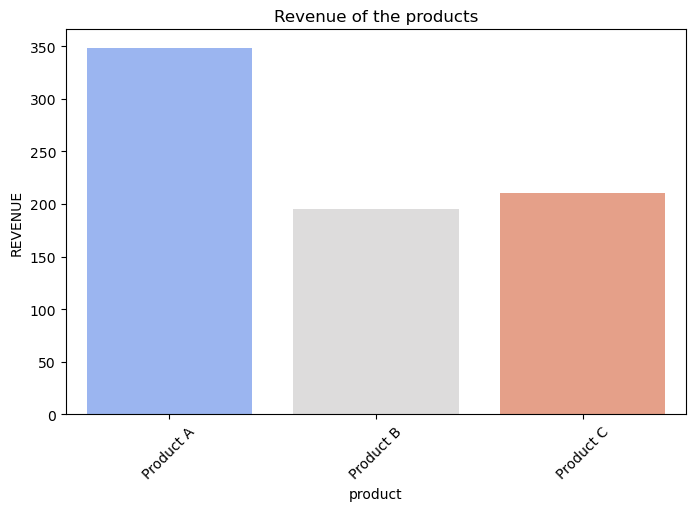

In [7]:
plt.figure(figsize = (8, 5))
sns.barplot(x="product", y="REVENUE", hue="product", data=df, palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.title("Revenue of the products")
plt.savefig("revenue_bar_chart.png")
plt.show()